# K-means Clustering
There are many clustering algorithms, but perhaps the simplest to understand is an algorithm k-means clustering.

In [3]:
# standard imports
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
import pandas as pd
%matplotlib inline

# Example: Clustering Talents
## Loading the data

In [6]:
# loading the data the data 
data = pd.read_csv("InstagramVideoDataScores.csv")
data.head()

,Unnamed: 0,talentId,platformId,type,followers,Avg View Through Rate,Avg Engagement Rate
0,13,0088a700-4144-4fd0-976c-bd9178414d6b,1.125563e+09,video,11399,1.20%,0.20%
1,15,02c592c7-106a-4d99-aca8-3b45724191e3,7.579333e+08,video,15147,3.58%,0.55%
2,17,042d2f1d-91c5-4115-ad02-e8a28e0cd383,2.242085e+08,video,13461,3.51%,1.05%
3,19,060c3a83-d443-4f60-aa65-9a939b9814be,3.086299e+08,video,7158,12.01%,3.19%
4,21,061a2922-8adb-4918-8789-56fdedf13993,1.491845e+09,video,14325,12.50%,1.84%


## Data cleaning and preprocessing
### Remove unneeded columns

In [7]:
# remove unneeded columns
data = data.drop(axis=1, columns=['Unnamed: 0', 'talentId', 'platformId', 'type'])
data.head()

,followers,Avg View Through Rate,Avg Engagement Rate
0,11399,1.20%,0.20%
1,15147,3.58%,0.55%
2,13461,3.51%,1.05%
3,7158,12.01%,3.19%
4,14325,12.50%,1.84%


### Remove % symbols

In [8]:
data['Avg View Through Rate'] = [x.strip('%') for x in data['Avg View Through Rate']]
data['Avg Engagement Rate'] = [x.strip('%') for x in data['Avg Engagement Rate']]
data.head()

,followers,Avg View Through Rate,Avg Engagement Rate
0,11399,1.20,0.20
1,15147,3.58,0.55
2,13461,3.51,1.05
3,7158,12.01,3.19
4,14325,12.50,1.84


### Change averages from strings to numberic data

In [9]:
data['Avg View Through Rate'] = pd.to_numeric(data['Avg View Through Rate'])
data['Avg Engagement Rate'] = pd.to_numeric(data['Avg Engagement Rate'])
data.head()

,followers,Avg View Through Rate,Avg Engagement Rate
0,11399,1.20,0.20
1,15147,3.58,0.55
2,13461,3.51,1.05
3,7158,12.01,3.19
4,14325,12.50,1.84


### Filter Engagement and View Through rate

In [10]:
data = data.loc[(data['followers'] <= 1000000)]
data = data.loc[(data['Avg View Through Rate'] <= 300)]

In [13]:
# print data shape (dimensions)
print(data.shape)
data.head()

(2087, 3)


,followers,Avg View Through Rate,Avg Engagement Rate
0,11399,1.20,0.20
1,15147,3.58,0.55
2,13461,3.51,1.05
3,7158,12.01,3.19
4,14325,12.50,1.84


## K-means

In [17]:
from sklearn.cluster import KMeans

In [24]:
# init k-means, set number of clusters
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data)

### Plotting Results
#### Followers vs Avg Engagement

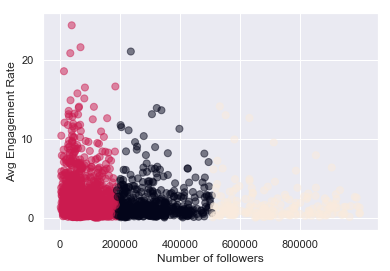

In [25]:
plt.yticks(np.arange(0, 30, step=10))
plt.xticks(np.arange(0, 1000000, step=200000))
plt.xlabel("Number of followers")
plt.ylabel("Avg Engagement Rate")
# plot followers vs avg engagement rate
plt.scatter(data.followers, data['Avg Engagement Rate'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

#### Followers vs Avg View Through Rate

[[3.03420729e+05 2.08610384e+01 2.02659142e+00]
 [7.46525296e+04 2.23072383e+01 2.36245179e+00]
 [7.11595526e+05 1.68878125e+01 1.80463542e+00]]


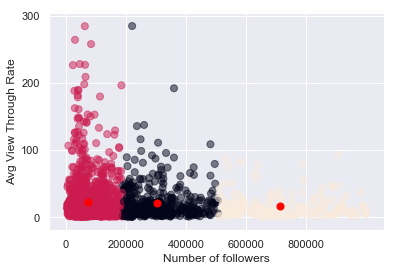

In [26]:
centroids = kmeans.cluster_centers_
print(centroids)
plt.yticks(np.arange(0, 350, step=100))
plt.xticks(np.arange(0, 1000000, step=200000))
plt.xlabel("Number of followers")
plt.ylabel("Avg View Through Rate")
plt.scatter(data.followers, data['Avg View Through Rate'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

### 3D Plot

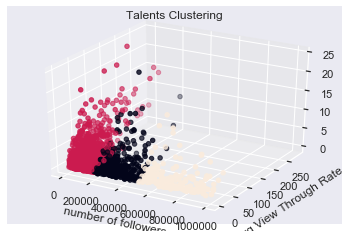

In [28]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
plt.xlabel('number of followers')
plt.ylabel('Avg View Through Rate')
plt.title('Talents Clustering')
ax.scatter3D(data.followers, 
             data['Avg View Through Rate'], 
             data['Avg Engagement Rate'], 
             c=kmeans.labels_.astype(float))
plt.savefig('3d.pdf')